In [21]:
import pandas as pd

from foggy_statslib import core as fc
from foggy_statslib import fin as ff

# vs SPY

In [71]:
TICKERS = ["NYSE-ESS", "SPY"]

def _get_r(ticker: str = TICKERS[0], freq: str = "B") -> pd.Series:
    return (
        pd.read_csv(
            f"data/yahoo-finance_{ticker}_px.csv",
            index_col="Date",
            parse_dates=True,
        )
        ["Adj Close"]
        .asfreq("B").ffill().asfreq(freq)
        .pct_change()
    )

def get_r() -> pd.DataFrame:
    r =  pd.DataFrame(
        {
            ticker:
            _get_r(ticker=ticker)
            for ticker in TICKERS
        }
    )
    r = fc.get_common_subsample(r)
    return r

r = get_r()

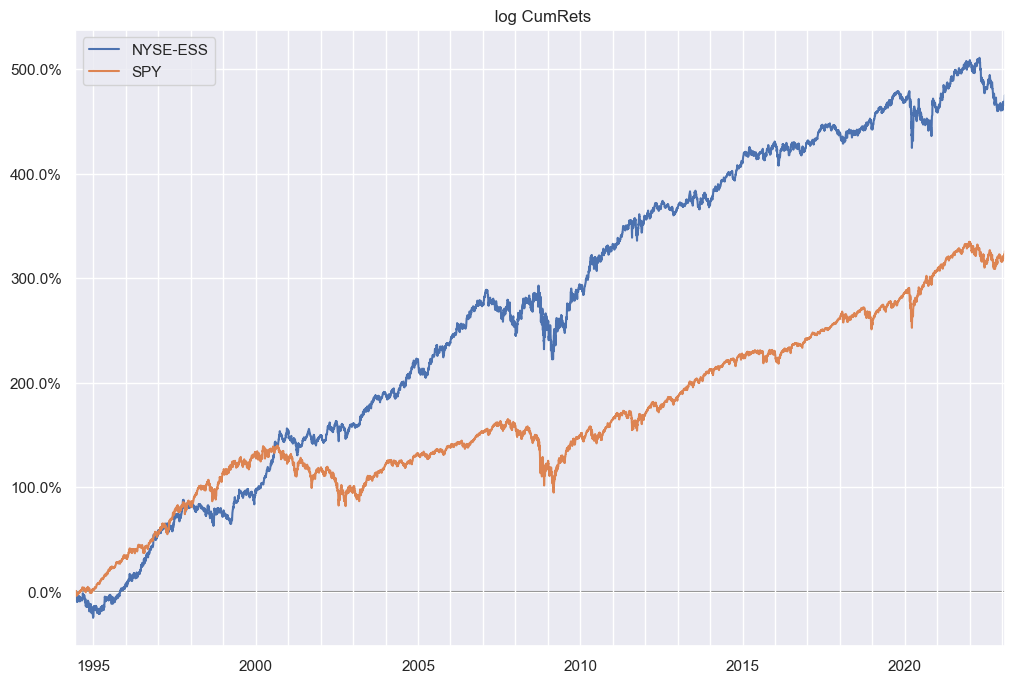

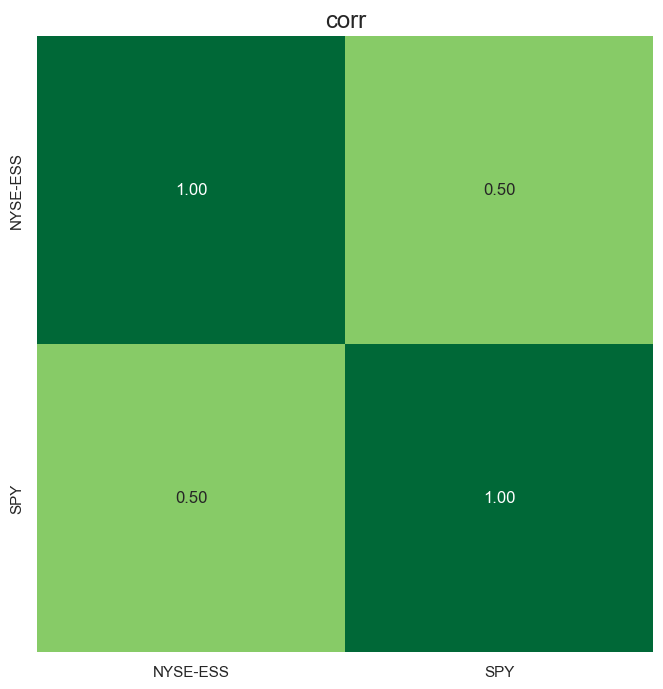

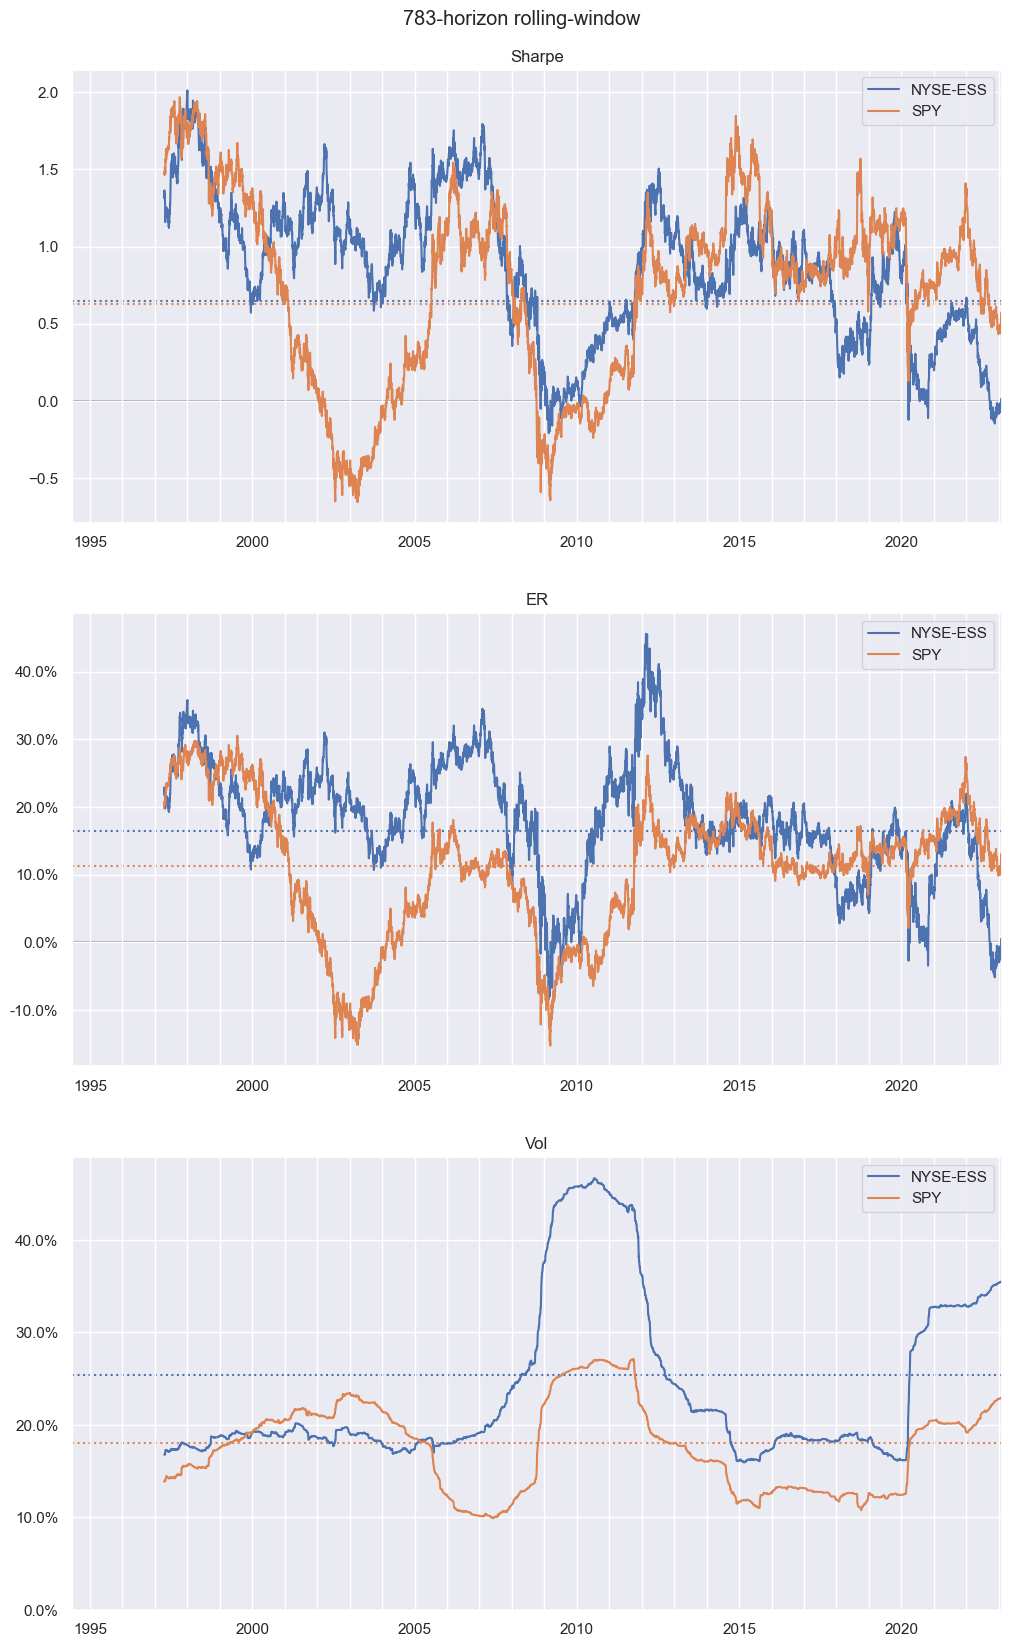

                            NYSE-ESS                  SPY
Sharpe                          0.65                 0.63
t-stat                          3.47                 3.36
ER                            0.1648               0.1133
Vol                           0.2541               0.1802
Frac valid obs                   1.0                  1.0
Total valid obs                 7478                 7478
Total obs                       7478                 7478
First obs        1994-06-08 00:00:00  1994-06-08 00:00:00
First valid obs  1994-06-08 00:00:00  1994-06-08 00:00:00
Last valid obs   2023-02-03 00:00:00  2023-02-03 00:00:00
Last obs         2023-02-03 00:00:00  2023-02-03 00:00:00


In [72]:
ff.chart_r(r=r)

<AxesSubplot: xlabel='Date'>

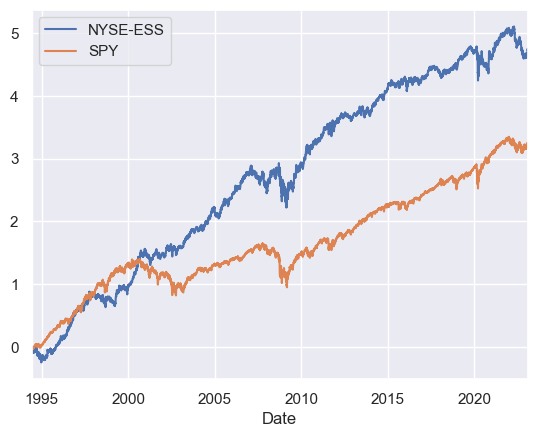

In [73]:
r.cumsum().plot()

In [74]:
# check calc'ed correl
pd.Series(
    {
        freq:
        (
            r
            # refreq -- like `ff._get_refreqed_r()`
            .cumsum().asfreq(freq).diff()
            .corr()
            # pull scalar
            .loc[
                TICKERS[0],
                TICKERS[1]
            ]
        )
        for freq in ["BM", "BQ", "BA"]
    },
    name="corr",
).rename_axis(index="freq")

freq
BM    0.429859
BQ    0.411985
BA    0.329622
Name: corr, dtype: float64

In [75]:
ff.table_est_perf_stats_of_r(r=r, rounded=False)["standalone"].T

,NYSE-ESS,SPY
Sharpe,0.648776,0.6286
t-stat,3.472698,3.364704
ER,0.164829,0.113304
Vol,0.254062,0.180248
Frac valid obs,1.0,1.0
Total valid obs,7478,7478
Total obs,7478,7478
First obs,1994-06-08 00:00:00,1994-06-08 00:00:00
First valid obs,1994-06-08 00:00:00,1994-06-08 00:00:00
Last valid obs,2023-02-03 00:00:00,2023-02-03 00:00:00


In [76]:
ff.table_est_perf_stats_of_r(
    r=r.loc[
        # most recent decade
        fc.maybe_date(ow_offset=-10*261):,
        :
    ],
    rounded=False
)["standalone"].T

,NYSE-ESS,SPY
Sharpe,0.410368,0.821292
t-stat,1.297696,2.597155
ER,0.100363,0.134145
Vol,0.244569,0.163334
Frac valid obs,1.0,1.0
Total valid obs,2610,2610
Total obs,2610,2610
First obs,2013-02-04 00:00:00,2013-02-04 00:00:00
First valid obs,2013-02-04 00:00:00,2013-02-04 00:00:00
Last valid obs,2023-02-03 00:00:00,2023-02-03 00:00:00


In [77]:
ff.get_est_perf_stats_of_r(r=r)

,Sharpe,t-stat,ER,Vol
NYSE-ESS,0.648776,3.472698,0.164829,0.254062
SPY,0.628600,3.364704,0.113304,0.180248


# vs (USA::CA and USA full) All-transactions house-price index

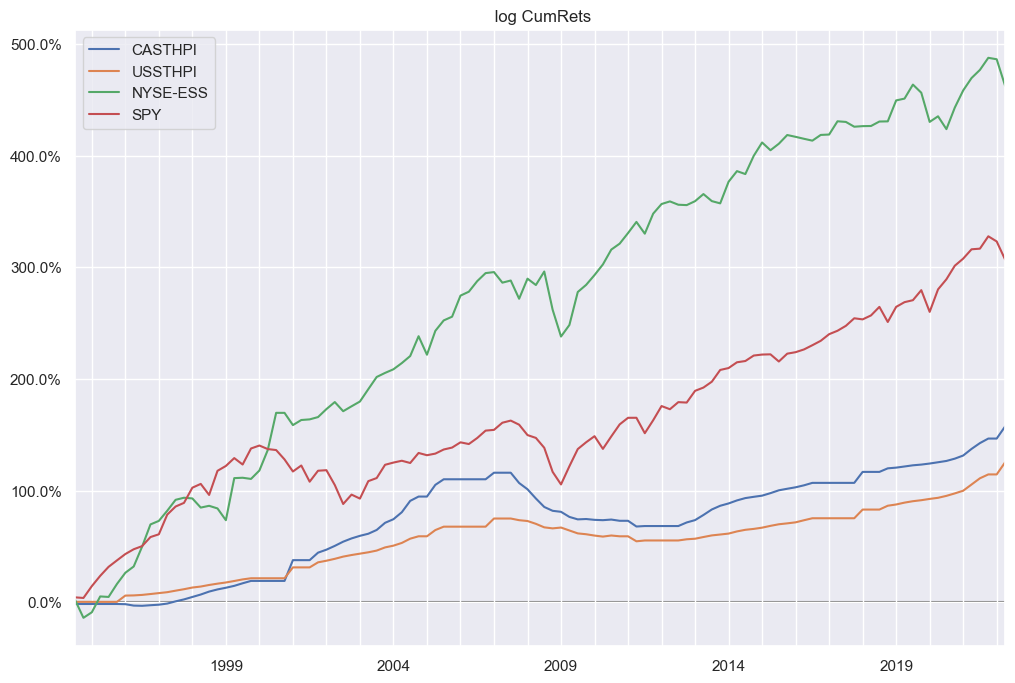

<AxesSubplot: title={'center': ' log CumRets'}>

In [96]:
TICKERS = ["CASTHPI", "USSTHPI", "NYSE-ESS", "SPY"]
FREQ = "BQ"

def _get_r(ticker: str = TICKERS[0], freq: str = FREQ) -> pd.Series:
    try:
        return (
            pd.read_csv(
                f"data/fred_{ticker}_px.csv",
                index_col="DATE",
                parse_dates=True,
            )
            [ticker]
            .asfreq("B").ffill().asfreq(freq)
            .pct_change()
        )
    except FileNotFoundError:
        return (
            pd.read_csv(
                f"data/yahoo-finance_{ticker}_px.csv",
                index_col="Date",
                parse_dates=True,
            )
            ["Adj Close"]
            .asfreq("B").ffill().asfreq(freq)
            .pct_change()
        )

def get_r() -> pd.DataFrame:
    r =  pd.DataFrame(
        {
            ticker:
            _get_r(ticker=ticker)
            for ticker in TICKERS
        }
    )
    r = fc.get_common_subsample(r)
    return r

r = get_r()

ff.plot_cum_r(r)

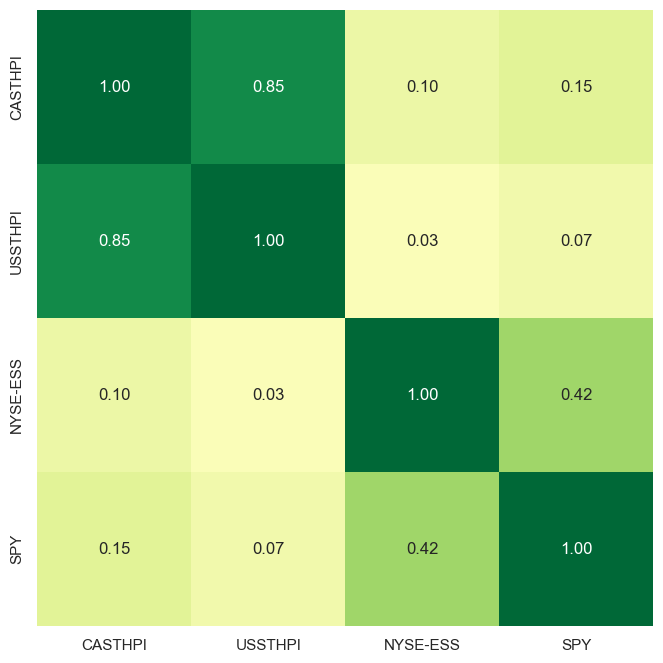

In [97]:
ff.fsc.plot_corr_heatmap(
    corr_matrix=ff.fsset.get_est_corr(r),
)

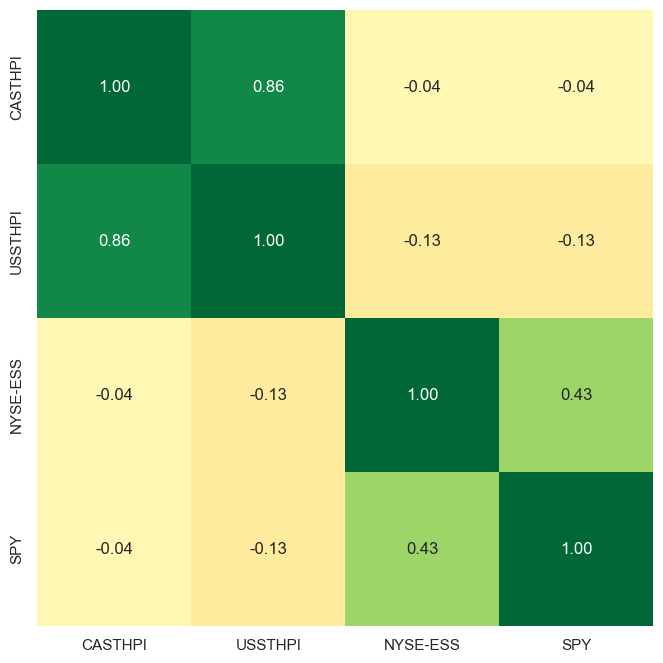

In [98]:
ff.fsc.plot_corr_heatmap(
    corr_matrix=r.corr(),
)

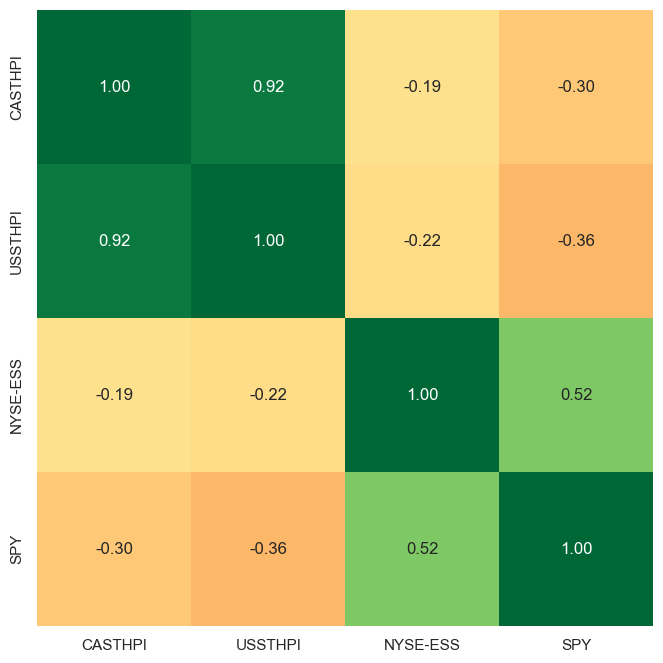

In [99]:
ff.fsc.plot_corr_heatmap(
    corr_matrix=(
        r
        .loc[
            # most recent decade
            fc.maybe_date(ow_offset=-10*261):,
            :
        ]
        .corr()
    )
)